# TASK-3

### Data Exploration and Cleaning

Importing pandas library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading or loading csv file

In [2]:
df = pd.read_csv("noisy_covid_data (1).csv")

Getting to know about the data 

In [3]:
a = df.head()
a


,Country,State,Confirmed,Deaths,Recovered,Date
0,Russia,Berlin,1486.0,NaN,50392.0,2022-05-07
1,France,New York,24762.0,2656.0,51021.0,2022-01-29
2,United Kingdom,Karnataka,27613.0,4875.0,18420.0,2021-07-20
3,United States,Florida,4196.0,2299.0,17202.0,2022-07-04
4,Russia,Moscow,NaN,3882.0,2394.0,2021-12-21


In [4]:
print(df.dtypes) 
print()
print("shape is : ",df.shape)
print()
print("Statistical Data:\n")
print(df.describe()) 
print('\n')
print("Info of the data :\n")
print(df.info())

Country       object
State         object
Confirmed    float64
Deaths       float64
Recovered    float64
Date          object
dtype: object

shape is :  (1000, 6)

Statistical Data:

           Confirmed       Deaths     Recovered
count     900.000000   900.000000    900.000000
mean    56043.782222  2490.523333  35400.577778
std     61621.220858  1429.540547  20600.337195
min      1002.000000    17.000000    536.000000
25%     25720.000000  1243.750000  17531.500000
50%     52682.000000  2524.500000  35093.000000
75%     77178.000000  3787.500000  54226.250000
max    865970.000000  4998.000000  69885.000000


Info of the data :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    1000 non-null   object 
 1   State      1000 non-null   object 
 2   Confirmed  900 non-null    float64
 3   Deaths     900 non-null    float64
 4   Recovered  90

Checking the null values by column names

In [5]:
a = df.isna().sum()
print(a)

Country        0
State          0
Confirmed    100
Deaths       100
Recovered    100
Date           0
dtype: int64


Checking nulls by rows

Fillling null values with 0 

In [6]:
# Using lambda function
# df = df.apply(lambda x: x.fillna(0) if x.dtype in ['int64', 'float64'] else x)
#print(df)

filled_data = df[['Confirmed', 'Deaths', 'Recovered']].fillna(0)
filled_data

,Confirmed,Deaths,Recovered
0,1486.0,0.0,50392.0
1,24762.0,2656.0,51021.0
2,27613.0,4875.0,18420.0
3,4196.0,2299.0,17202.0
4,0.0,3882.0,2394.0
...,...,...,...
995,60372.0,3497.0,4800.0
996,0.0,3860.0,3838.0
997,54863.0,0.0,63101.0
998,90941.0,900.0,0.0


Handling outliers (gt) > 50k with a ffill

In [7]:
filled_data = filled_data.where(filled_data <= 50000, np.mean).bfill()
filled_data

,Confirmed,Deaths,Recovered
0,1486.000,0.0,28180.465
1,24762.000,2656.0,28180.465
2,27613.000,4875.0,18420.000
3,4196.000,2299.0,17202.000
4,0.000,3882.0,2394.000
...,...,...,...
995,28180.465,3497.0,4800.000
996,0.000,3860.0,3838.000
997,28180.465,0.0,28180.465
998,28180.465,900.0,0.000


### Use Case 2: Country-Level COVID-19 Analysis

Groupin Data By Country

In [8]:
df_grouped = df.groupby('Country').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'}).reset_index()
df_grouped

,Country,Confirmed,Deaths,Recovered
0,Brazil,5459110.0,222424.0,3367134.0
1,France,4765469.0,223333.0,2907060.0
2,Germany,4261936.0,210541.0,3172883.0
3,India,7464809.0,257437.0,3514596.0
4,Italy,4891820.0,270143.0,3055729.0
5,Mexico,5632946.0,259871.0,4112546.0
6,Russia,4498728.0,200076.0,3267724.0
7,Spain,4614646.0,165317.0,2419315.0
8,United Kingdom,4808425.0,206574.0,3124525.0
9,United States,4041515.0,225755.0,2919008.0


Country ranking According to Confirmed Covid Patients

In [9]:
top_10_countries = df_grouped.sort_values(by='Confirmed', ascending=False)
top_10_countries

,Country,Confirmed,Deaths,Recovered
3,India,7464809.0,257437.0,3514596.0
5,Mexico,5632946.0,259871.0,4112546.0
0,Brazil,5459110.0,222424.0,3367134.0
4,Italy,4891820.0,270143.0,3055729.0
8,United Kingdom,4808425.0,206574.0,3124525.0
1,France,4765469.0,223333.0,2907060.0
7,Spain,4614646.0,165317.0,2419315.0
6,Russia,4498728.0,200076.0,3267724.0
2,Germany,4261936.0,210541.0,3172883.0
9,United States,4041515.0,225755.0,2919008.0


Fatality Rate

In [10]:
df_grouped['Fatality Rate (%)'] = (df_grouped['Deaths'] / df_grouped['Confirmed']) * 100

df_grouped['Fatality Rate (%)'] = df_grouped['Fatality Rate (%)'].fillna(0)
df_grouped

,Country,Confirmed,Deaths,Recovered,Fatality Rate (%)
0,Brazil,5459110.0,222424.0,3367134.0,4.074364
1,France,4765469.0,223333.0,2907060.0,4.686485
2,Germany,4261936.0,210541.0,3172883.0,4.940032
3,India,7464809.0,257437.0,3514596.0,3.448675
4,Italy,4891820.0,270143.0,3055729.0,5.522341
5,Mexico,5632946.0,259871.0,4112546.0,4.613412
6,Russia,4498728.0,200076.0,3267724.0,4.447390
7,Spain,4614646.0,165317.0,2419315.0,3.582442
8,United Kingdom,4808425.0,206574.0,3124525.0,4.296084
9,United States,4041515.0,225755.0,2919008.0,5.585900


### Use Case 3: Trend Analysis for Specific Country

country Wise Filtering

In [11]:
def Country_wise_filtering(country):
    df_country = df[df['Country'] == country]
    if df_country.empty:
        return f"No data available for {country}"
    else:
        df_country_grouped = df_country.groupby('Country').agg({'Confirmed': 'sum','Deaths': 'sum','Recovered': 'sum'}).reset_index()
        return df_country_grouped
result = Country_wise_filtering('France')
result

,Country,Confirmed,Deaths,Recovered
0,France,4765469.0,223333.0,2907060.0


Deaths by Date

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].ffill()
aggregated_df = df.groupby('Date').agg({'Confirmed': 'sum','Deaths': 'sum','Recovered': 'sum'}).reset_index()
aggregated_df

,Date,Confirmed,Deaths,Recovered
0,2020-01-02,50777.0,3964.0,0.0
1,2020-01-03,122096.0,6563.0,47459.0
2,2020-01-04,116520.0,3035.0,49896.0
3,2020-01-05,33583.0,339.0,46202.0
4,2020-01-06,94461.0,7515.0,37483.0
...,...,...,...,...
626,2022-09-22,29314.0,2645.0,30548.0
627,2022-09-23,167798.0,13031.0,16173.0
628,2022-09-24,91410.0,3835.0,65232.0
629,2022-09-25,246472.0,12217.0,185486.0


Visualizing Trends

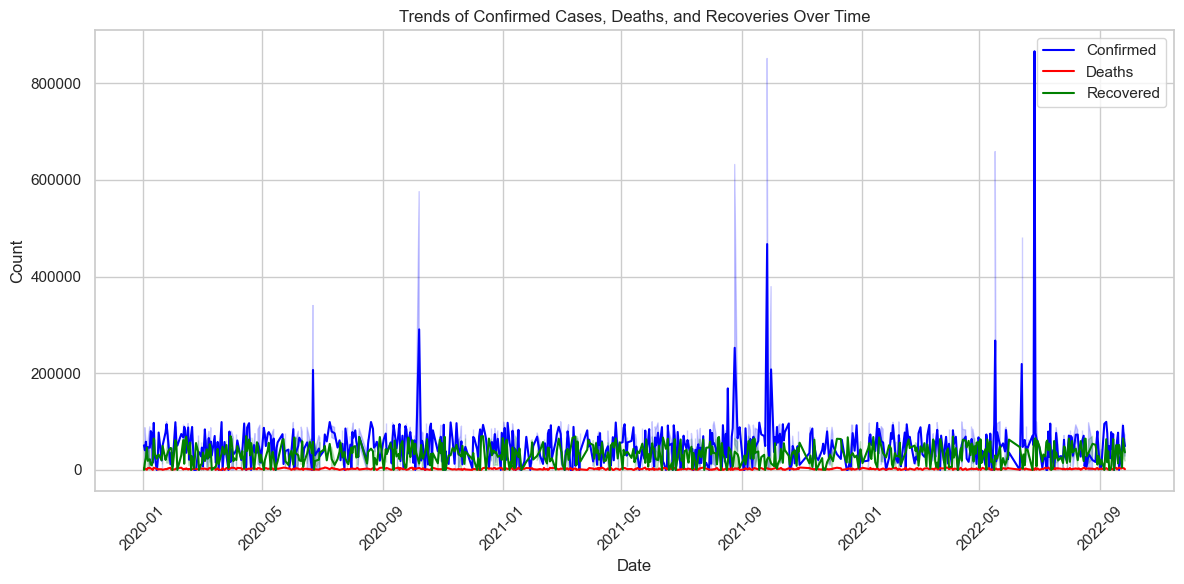

In [13]:
df.fillna({'Confirmed': 0, 'Deaths': 0, 'Recovered': 0}, inplace=True) #filled missing values with 0
# Set the plot style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))

# Plot Confirmed cases
sns.lineplot(data=df, x='Date', y='Confirmed', label='Confirmed', color='blue')

# Plot Deaths
sns.lineplot(data=df, x='Date', y='Deaths', label='Deaths', color='red')

# Plot Recoveries
sns.lineplot(data=df, x='Date', y='Recovered', label='Recovered', color='green')

# Customize the plot
plt.title('Trends of Confirmed Cases, Deaths, and Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Use Case 4: Time-Series Resampling and Rolling Averages

Resampling Data

In [14]:
# Set Date as the index
df.set_index('Date', inplace=True)

# Resample the data to weekly frequency and sum the values
weekly_df = df.resample('W').sum()

# Reset index to turn the index back into a column
weekly_df.reset_index(inplace=True)

weekly_df


,Date,Country,State,Confirmed,Deaths,Recovered
0,2020-01-05,IndiaUnited KingdomFranceSpainFranceUnited Sta...,MoscowNew YorkLondonTexasMoscowTexasNew York,322976.0,13901.0,143557.0
1,2020-01-12,MexicoUnited StatesRussiaUnited KingdomUnited ...,KarnatakaBerlinLondonCaliforniaCaliforniaKarna...,530699.0,26373.0,194881.0
2,2020-01-19,RussiaMexicoGermanyUnited KingdomFranceUnited ...,ParisMoscowParisKarnatakaBerlinTexasBerlinLond...,223969.0,15725.0,270657.0
3,2020-01-26,ItalyUnited KingdomIndiaMexicoUnited KingdomSpain,MaharashtraNew YorkKarnatakaLondonBerlinBerlin,356509.0,7759.0,166733.0
4,2020-02-02,FranceBrazilFranceItalyIndiaSpainItaly,ParisParisLondonParisTexasKarnatakaMoscow,261930.0,18635.0,249572.0
...,...,...,...,...,...,...
139,2022-09-04,IndiaUnited StatesIndiaBrazilIndiaBrazilFrance,MoscowMoscowTexasCaliforniaMaharashtraTexasParis,181546.0,16591.0,133659.0
140,2022-09-11,ItalyBrazilIndiaRussiaItalySpain,New YorkBerlinLondonKarnatakaNew YorkFlorida,367103.0,15103.0,117889.0
141,2022-09-18,FranceItalyFranceFranceItalySpainBrazil,MoscowTexasCaliforniaCaliforniaBerlinFloridaCa...,337006.0,15730.0,234365.0
142,2022-09-25,RussiaIndiaItalyMexicoUnited StatesFranceMexic...,MaharashtraTexasCaliforniaBerlinMaharashtraCal...,689087.0,42763.0,375846.0


Calculating rolling Average

In [15]:
df['7_Day_Rolling_Avg'] = df['Confirmed'].rolling(window=7).mean()

# Reset index to turn Date back into a column
df.reset_index(inplace=True)

# Display the DataFrame with the rolling average
print(df[['Date', 'Confirmed', '7_Day_Rolling_Avg']])

          Date  Confirmed  7_Day_Rolling_Avg
0   2022-05-07     1486.0                NaN
1   2022-01-29    24762.0                NaN
2   2021-07-20    27613.0                NaN
3   2022-07-04     4196.0                NaN
4   2021-12-21        0.0                NaN
..         ...        ...                ...
995 2020-11-17    60372.0       32958.714286
996 2022-09-01        0.0       29940.857143
997 2020-03-06    54863.0       37778.428571
998 2022-04-22    90941.0       44097.428571
999 2021-07-10    39737.0       47105.285714

[1000 rows x 3 columns]


Visualizing the Rolling Average: Plot the rolling average to show smoothed trends over
time

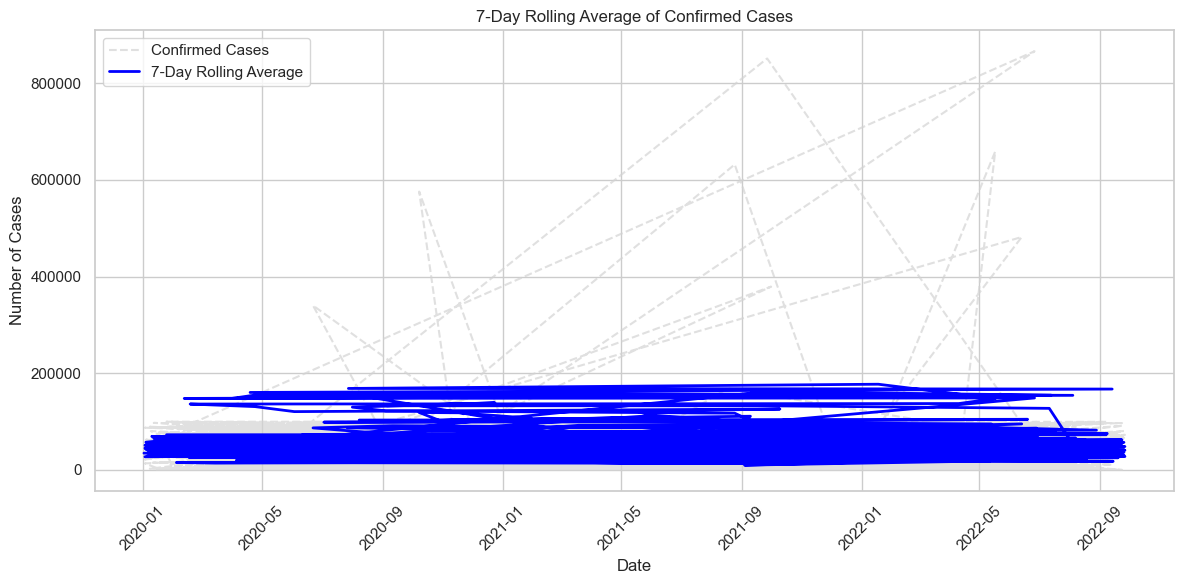

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Confirmed'], label='Confirmed Cases', color='lightgray', linestyle='--', alpha=0.7)
plt.plot(df['Date'], df['7_Day_Rolling_Avg'], label='7-Day Rolling Average', color='blue', linewidth=2)
plt.title('7-Day Rolling Average of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Use Case 5: Merging External Data

Merge Population Data

Loading population data set

In [17]:
pop = pd.read_csv('population_data.csv')
pop

,Country,Population
0,United States,331002651
1,India,1380004385
2,Brazil,212559417
3,Russia,145934462
4,France,65273511
5,United Kingdom,67886011
6,Italy,60461826
7,Spain,46754778
8,Germany,83783942
9,Mexico,128932753


Merging both covid and pop datasets 


In [18]:
merged_data = pd.merge(df, pop, on='Country', how='left')
merged_data.head()

,Date,Country,State,Confirmed,Deaths,Recovered,7_Day_Rolling_Avg,Population
0,2022-05-07,Russia,Berlin,1486.0,0.0,50392.0,NaN,145934462
1,2022-01-29,France,New York,24762.0,2656.0,51021.0,NaN,65273511
2,2021-07-20,United Kingdom,Karnataka,27613.0,4875.0,18420.0,NaN,67886011
3,2022-07-04,United States,Florida,4196.0,2299.0,17202.0,NaN,331002651
4,2021-12-21,Russia,Moscow,0.0,3882.0,2394.0,NaN,145934462


Calulating percapita

In [19]:
merged_data['Confirmed_per_capita'] = merged_data['Confirmed'] / merged_data['Population']
print(merged_data['Confirmed_per_capita'].head())

0    0.000010
1    0.000379
2    0.000407
3    0.000013
4    0.000000
Name: Confirmed_per_capita, dtype: float64


handling missing values

In [20]:
merged_data['Confirmed'] = merged_data['Confirmed'].fillna(0)
# Recalculating confirmed cases per capita after handling missing values
merged_data['Confirmed_per_capita'] = merged_data['Confirmed'] / merged_data['Population']
merged_data[['Country', 'Confirmed', 'Population', 'Confirmed_per_capita']].head()

,Country,Confirmed,Population,Confirmed_per_capita
0,Russia,1486.0,145934462,0.000010
1,France,24762.0,65273511,0.000379
2,United Kingdom,27613.0,67886011,0.000407
3,United States,4196.0,331002651,0.000013
4,Russia,0.0,145934462,0.000000


ranking countries by confirmed cases percapita

In [21]:
merged_data['Rank'] = merged_data['Confirmed_per_capita'].rank(ascending=False)

# Sort by rank
ranked_data = merged_data.sort_values(by='Rank')

# Display the ranked countries
ranked_data[['Country', 'Confirmed', 'Population', 'Confirmed_per_capita', 'Rank']]

,Country,Confirmed,Population,Confirmed_per_capita,Rank
499,Spain,658570.0,46754778,0.014086,1.0
526,Italy,631750.0,60461826,0.010449,2.0
323,United Kingdom,340120.0,67886011,0.005010,3.0
353,Mexico,575650.0,128932753,0.004465,4.0
762,Brazil,481760.0,212559417,0.002266,5.0
...,...,...,...,...,...
356,United Kingdom,0.0,67886011,0.000000,950.5
990,France,0.0,65273511,0.000000,950.5
11,Spain,0.0,46754778,0.000000,950.5
10,Italy,0.0,60461826,0.000000,950.5


summarizing the data 

In [22]:
country_summary = df.groupby('Country').agg(
    Total_Confirmed=('Confirmed', 'sum'),
    Total_Deaths=('Deaths', 'sum'),
    Total_Recovered=('Recovered', 'sum')
).reset_index()

# Calculate Fatality Rate (deaths per confirmed case)
country_summary['Fatality_Rate'] = (country_summary['Total_Deaths'] / country_summary['Total_Confirmed']) * 100

# Handle any potential division by zero
country_summary['Fatality_Rate'] = country_summary['Fatality_Rate'].replace([float('inf'), -float('inf')], 0)
country_summary['Fatality_Rate'] = country_summary['Fatality_Rate'].fillna(0)

# Display the summary
country_summary

,Country,Total_Confirmed,Total_Deaths,Total_Recovered,Fatality_Rate
0,Brazil,5459110.0,222424.0,3367134.0,4.074364
1,France,4765469.0,223333.0,2907060.0,4.686485
2,Germany,4261936.0,210541.0,3172883.0,4.940032
3,India,7464809.0,257437.0,3514596.0,3.448675
4,Italy,4891820.0,270143.0,3055729.0,5.522341
5,Mexico,5632946.0,259871.0,4112546.0,4.613412
6,Russia,4498728.0,200076.0,3267724.0,4.447390
7,Spain,4614646.0,165317.0,2419315.0,3.582442
8,United Kingdom,4808425.0,206574.0,3124525.0,4.296084
9,United States,4041515.0,225755.0,2919008.0,5.585900


exporting the summarized and cleaned data to csv again

In [23]:
country_summary.to_csv('chandu_hashInclude.csv).csv', index=False)